# Data Science Hackathon: Ecommerce Product Categorization

## Introduction
In this hackathon, we aim to develop a text classification model that accurately categorizes eCommerce products based on their descriptions, addressing challenges such as ambiguities, unconventional naming conventions, and multi-language data.


## Data Exploration and Preparation

### 1. Explore and Analyze the Dataset
We start by exploring and analyzing the dataset to understand its structure, key features, detect missing data, and identify ambiguities.


In [20]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk
import numpy as np
import re
nltk.download('wordnet')
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FEEDBACK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
# Load the dataset
df = pd.read_excel("test_data.xlsx")

In [31]:
# Display the first few rows of the dataset
df.head()

,Unnamed: 0,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,vv art brass bracelet buy vv art brass bracele...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,kalpaveda copper copper cuff price r attract e...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl..."
2,2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,thelostpuppy book cover apple ipad air multico...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
3,3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,riana copper copper bangle buy riana copper co...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection..."
4,4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,inox jewelry stainless steel cuff price r inox...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl..."


In [35]:
# Display basic information about the dataset
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2534 non-null   int64  
 1   uniq_id                  2534 non-null   object 
 2   crawl_timestamp          2534 non-null   object 
 3   product_url              2534 non-null   object 
 4   product_name             2534 non-null   object 
 5   pid                      2534 non-null   object 
 6   retail_price             2530 non-null   float64
 7   discounted_price         2530 non-null   float64
 8   image                    2534 non-null   object 
 9   is_FK_Advantage_product  2534 non-null   bool   
 10  description              2534 non-null   object 
 11  product_rating           2534 non-null   object 
 12  overall_rating           2534 non-null   object 
 13  brand                    2012 non-null   object 
 14  pr

In [37]:
# Display summary statistics of the dataset
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
        Unnamed: 0  retail_price  discounted_price
count  2534.000000   2530.000000       2530.000000
mean   1266.500000   1894.598024       1011.826877
std     731.647114   2872.584966       1722.890000
min       0.000000     55.000000         47.000000
25%     633.250000    850.000000        449.000000
50%    1266.500000   1299.000000        600.000000
75%    1899.750000   2199.000000        950.000000
max    2533.000000  46500.000000      25510.000000


In [41]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0                   0
uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
pid                          0
retail_price                 4
discounted_price             4
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      522
product_specifications       5
dtype: int64


###  Frequency Chart for Product Retail Prices
We will visualize the distribution of product retail prices & discounted price using a histogram to understand the frequency of different price ranges.


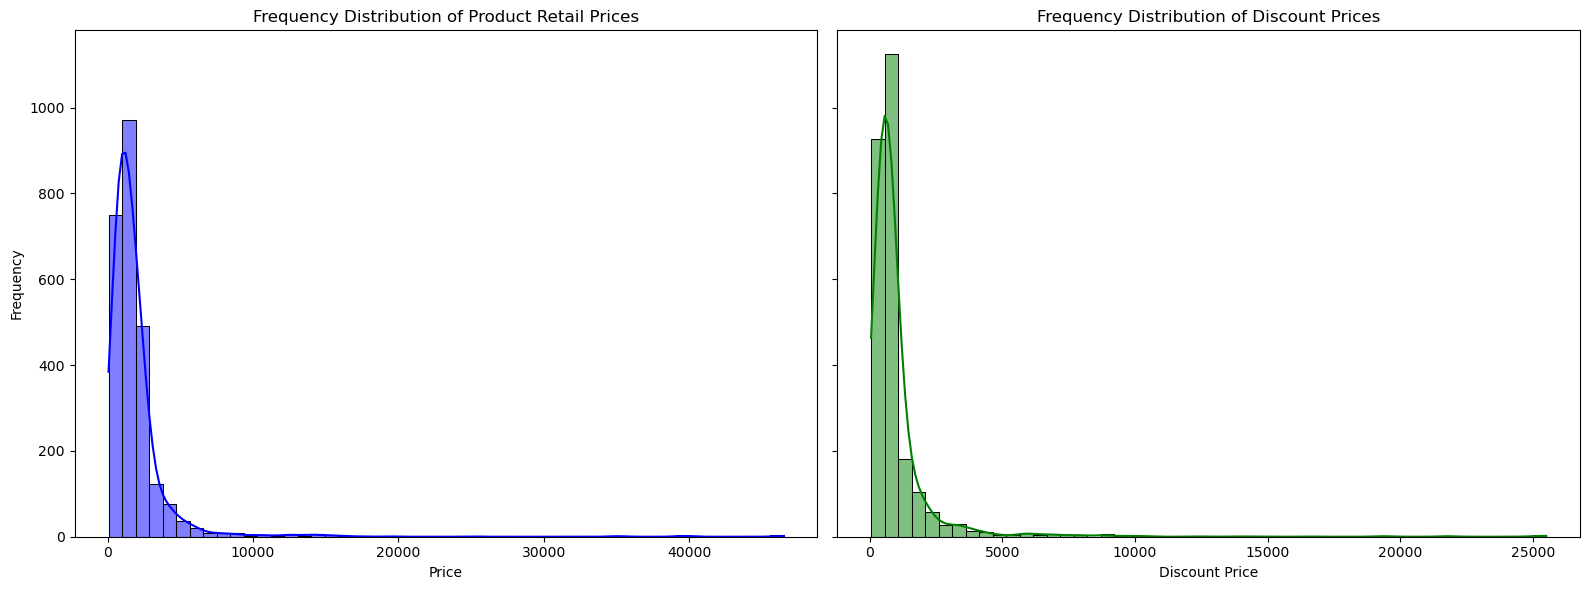

In [51]:
# Plot a histogram for the product price column using seaborn
# Create subplots for side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot a histogram for the product price column
sns.histplot(df['retail_price'], bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Frequency Distribution of Product Retail Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Plot a histogram for the discount price column
sns.histplot(df['discounted_price'], bins=50, kde=True, color='green', ax=axes[1])
axes[1].set_title('Frequency Distribution of Discount Prices')
axes[1].set_xlabel('Discount Price')

# Display the plots
plt.tight_layout()
plt.show()

### Text Preprocessing Function

The `preprocess` function is designed to clean and normalize text data for better analysis. It performs the following steps:
1. **Remove Punctuation and Numbers**: Eliminates all punctuation and numeric characters from the text.
2. **Convert to Lowercase**: Transforms the entire text to lowercase to ensure uniformity.
3. **Remove Stop Words**: Filters out common stop words (e.g., "the", "and") that do not contribute significant meaning to the analysis.
4. **Lemmatize Words**: Reduces words to their base or root forms (e.g., "running" to "run") to ensure that variations of a word are treated as the same term.

This preprocessing helps in standardizing text data, which improves the performance and accuracy of text classification models.


In [59]:
stop_words = set(stopwords.words('English'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    if isinstance(text, str):
        # Remove punctuations
        text = text.translate(str.maketrans("", "", string.punctuation))
        # Remove numbers
        text = re.sub(r'\d+', '', text)
        # Convert to lowercase
        text = text.lower()
        # Remove stop words
        text = " ".join([word for word in text.split() if word not in stop_words])
        # Lemmatize the words
        text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

df['description'] = df['description'].apply(preprocess)

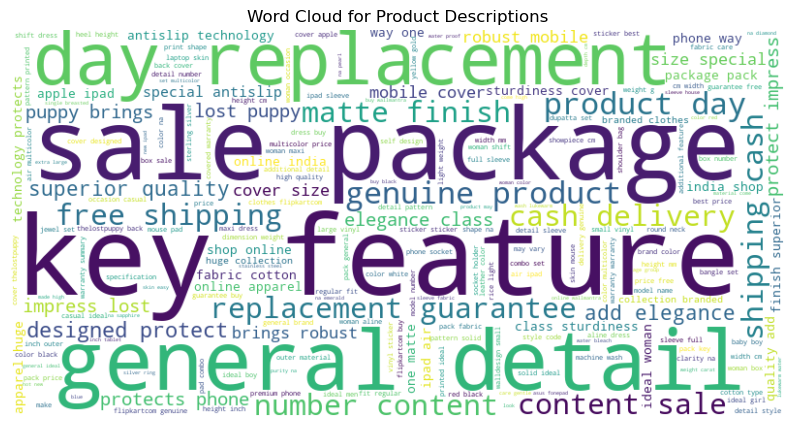

In [63]:
# Import necessary libraries for word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'description' column into a single string
text = ' '.join(df['description'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud for Product Descriptions')
plt.show()


### Saving Processed Data for Further Analysis

We will save the cleaned and preprocessed dataset into an Excel file to facilitate subsequent analysis and model training. This step ensures that the processed data is readily accessible and can be efficiently utilized in future stages of the project.


In [68]:
df.to_excel('test_data_Cleaned.xlsx')

In [154]:
# Load the training data
df = pd.read_csv('train_product_data.csv')

In [156]:
# Display the first few rows of the dataset
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [158]:
# Display basic information about the dataset
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  

In [160]:
# Display summary statistics of the dataset
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
        retail_price  discounted_price
count   14942.000000      14942.000000
mean     3128.424040       2087.732298
std      9154.463342       7712.247869
min        35.000000         35.000000
25%       699.000000        349.000000
50%      1000.000000        499.000000
75%      1989.750000        999.000000
max    571230.000000     571230.000000


In [162]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64


C:\Users\FEEDBACK\AppData\Local\Temp\ipykernel_19492\154902360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_category_tree', data=df, palette='viridis')


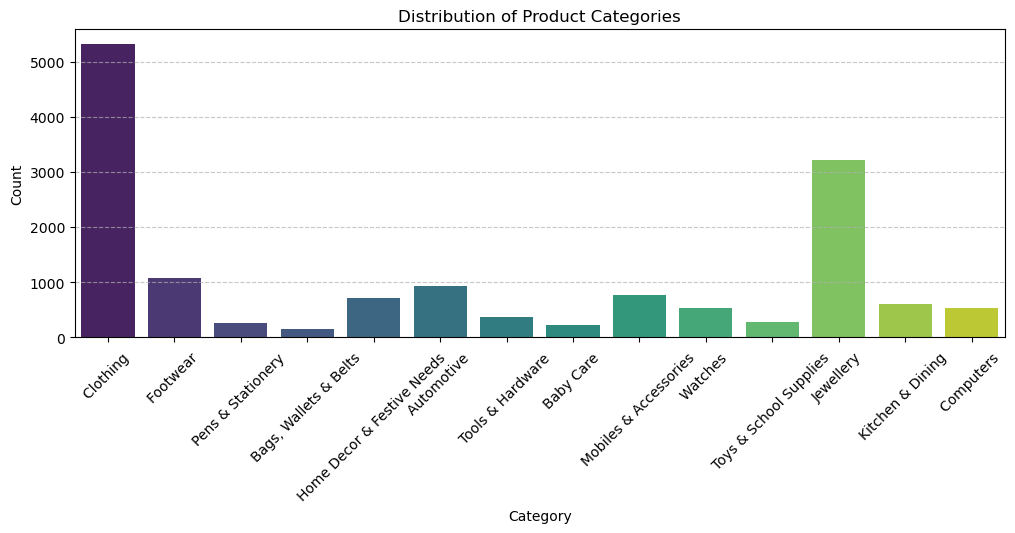

In [164]:
# Plot a bar chart for the 'category' column
plt.figure(figsize=(12, 4))
sns.countplot(x='product_category_tree', data=df, palette='viridis')
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [166]:
# Defining columns to be taken for reference whne training the module, Insert only the verbatim and themes columns in a dataframe.
col = ['product_category_tree', 'description']
df = df[col]

In [168]:
#Shows first five rows of the data for verifying if the right column has been take or not for training.
df.head()

,product_category_tree,description
0,Clothing,Key Features of Alisha Solid Women's Cycling S...
1,Footwear,Key Features of AW Bellies Sandals Wedges Heel...
2,Clothing,Key Features of Alisha Solid Women's Cycling S...
3,Clothing,Key Features of Alisha Solid Women's Cycling S...
4,Footwear,"Key Features of dilli bazaaar Bellies, Corpora..."


### Execute five steps simutaneously and in order to achieve the codes for looking up values after the outputs are released

In [170]:
#Introducing a new column 'category_id' to the dataframe created above to assign numeric values distinct for all the themes present in the training data
df['category_id'] = df['product_category_tree'].factorize()[0]
from io import StringIO
category_id_df = df[['product_category_tree', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'product_category_tree']].values)

In [172]:
df.head()

,product_category_tree,description,category_id
0,Clothing,Key Features of Alisha Solid Women's Cycling S...,0
1,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,1
2,Clothing,Key Features of Alisha Solid Women's Cycling S...,0
3,Clothing,Key Features of Alisha Solid Women's Cycling S...,0
4,Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",1


In [174]:
#Separating themes and factorizing
texts = df['product_category_tree']

In [176]:
texts

0                     Clothing 
1                     Footwear 
2                     Clothing 
3                     Clothing 
4                     Footwear 
                  ...          
14994    Mobiles & Accessories 
14995                Jewellery 
14996    Mobiles & Accessories 
14997                Jewellery 
14998                Jewellery 
Name: product_category_tree, Length: 14999, dtype: object

In [178]:
#assigning numbers
codes = df['product_category_tree'].factorize()[0]

In [180]:
codes

array([ 0,  1,  0, ...,  8, 11, 11], dtype=int64)

In [182]:
#Combining the values for lookup and codes together
final = pd.DataFrame(zip(texts,codes))

In [184]:
final

,0,1
0,Clothing,0
1,Footwear,1
2,Clothing,0
3,Clothing,0
4,Footwear,1
...,...,...
14994,Mobiles & Accessories,8
14995,Jewellery,11
14996,Mobiles & Accessories,8
14997,Jewellery,11


In [186]:
#using 'to_csv' to get the lookup file in .csv format.
final.to_csv('Codesforlookup_Category.csv')

# Feature Engineering
TF-IDF Vectors: This method transforms text into a matrix where each entry represents the importance of a word in a document relative to the entire dataset, accounting for both term frequency and inverse document frequency.

Word Embeddings: These are dense vector representations of words that capture semantic meanings and relationships between words, often learned from large corpora using algorithms like Word2Vec or GloVe.

Both methods enable the conversion of textual data into structured features that can be used for building and training models.

In [189]:
#Importing TfidfVectorizer module to transform the verbatims of the training data into vectors/Arrays
#Python only takes text imput as arrays or vectors, hence converting them

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.description.values.astype('U')).toarray()
labels = df.category_id
features.shape

(14999, 18874)

# Model Training
Model training involves selecting and applying machine learning algorithms to learn patterns from the data. In the context of text classification:

Algorithm Selection: Choose algorithms such as Logistic Regression, Naive Bayes, or Support Vector Machines, which are commonly used for text classification tasks due to their effectiveness in handling high-dimensional data.

Training Process: Split the data into training and testing sets. Train the selected model on the training set by feeding it features (e.g., TF-IDF vectors) and corresponding labels. The model learns to associate features with labels during this process.

Evaluation: Assess the model’s performance on the testing set using metrics like accuracy, precision, recall, and F1-score to ensure it generalizes well to unseen data.

This process enables the model to classify new, unseen text data accurately.

In [191]:
# Importing Modules to start structring the data for training
# Structuring the data means converting the text to machine understandable language(Arrays/Vectors), Both Vebatims and Themes are converted.
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['description'], df['product_category_tree'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.values.astype('U'))
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [193]:
#Testing Sample description
print(clf.predict(count_vect.transform(["Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts"])))

['Clothing ']


# Model Evaluation
Model evaluation involves assessing its performance using metrics such as accuracy, precision, recall, and F1-score. These metrics provide insights into how well the model performs in classifying data, including its effectiveness in handling different classes and its overall predictive accuracy.

In [195]:
#data is uploaded to the training module which is a stack of multiple Machine learning algorithms, the code is given below for the same
#Algorithms used are, Logsitic Regression, Random Forest, Multinomial Naive Bayes and Linear Support vector Machine.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\FEEDBACK\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\FEEDBACK\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\FEEDBACK\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\FEEDBACK\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\FEEDBACK\anaconda3\Lib\site-packages\sk

C:\Users\FEEDBACK\AppData\Local\Temp\ipykernel_19492\2698998690.py:6: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='model_name', y='accuracy', data=cv_df,


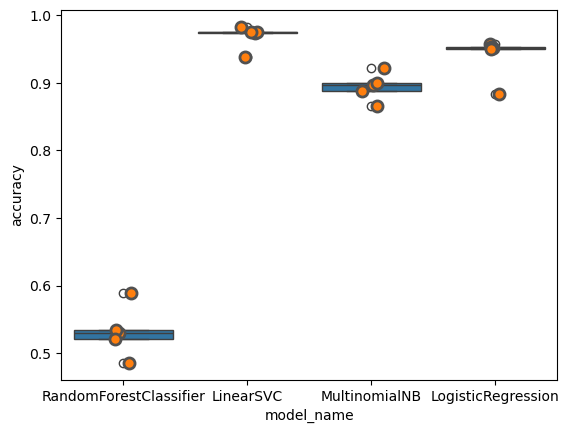

In [197]:
# Post training is completed, The accuracy is checked using the Seaborn module which is also a data visualization library.
# We use the boxplots to see the accuracy of all the four algorithms.
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [199]:
#Using Groupby to get all the algorthms and accuracies of each at one place.
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.968996
LogisticRegression        0.939192
MultinomialNB             0.894724
RandomForestClassifier    0.532368
Name: accuracy, dtype: float64

In [201]:
# selecting the model with highest accuracy
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\FEEDBACK\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [203]:
#Finalizing and fitting the algoritm to the trainig module, It defines that the algorithm chosen by us is used during testing.
model.fit(features, labels)

C:\Users\FEEDBACK\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [205]:
# This module helps us to see what words have come up most frequently with the themes during the training
#This helps us to identify if the training is taking place correctly.
from sklearn.feature_selection import chi2

N = 5
for Code_1, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Code_1))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Automotive ':
  . Top unigrams:
       . car
       . vehicle
       . wheeler
       . mat
       . steering
  . Top bigrams:
       . online genuine
       . car mat
       . steering cover
       . wheeler cover
       . vehicle brand
# 'Baby Care ':
  . Top unigrams:
       . baby
       . towel
       . photo
       . single
       . glue
  . Top bigrams:
       . baby girl
       . products free
       . ideal baby
       . photo frame
       . com offering
# 'Bags, Wallets & Belts ':
  . Top unigrams:
       . backpack
       . rucksack
       . bag
       . clutch
       . suspenders
  . Top bigrams:
       . com buy
       . suspenders men
       . card holder
       . backpack rs
       . bag rs
# 'Clothing ':
  . Top unigrams:
       . solid
       . bra
       . shirt
       . women
       . cotton
  . Top bigrams:
       . shirt price
       . bra price
       . women price
       . rs 220
       . self design
# 'Computers ':
  . Top unigrams:
       . usb
       . lapt

In [207]:
#Testing the trained module to sample verbatims.
texts = ["Specifications of Shopmania Music Band A5 Notebook Spiral Bound (Multicolor) General Ruling Ruled Model id NB00664 Type Notebook GSM 75 Cover Type 300 GSM Hard Laminated Cover No. of Pages 160 Brand Name Shopmania Binding Spiral Bound Color Multicolor Size A5 Dimensions Length 9 inch Width 6 inch Special Features Can be used as Notepad, Diary, Writing pad In the Box Sales Package 1 Notebook",
         "Angelfish Silk Potali Potli (Multicolor) Price: Rs. 399 Made by silk Fabric with fancy lace adnored and stylish handle also.(set of 2 piece),Specifications of Angelfish Silk Potali Potli (Multicolor) General Closure Velcro Type Potli Material Fabric Style Code AELKABJ01224-A Ideal For Girls Bag Size Small Occasion Party Color Code Multicolor Dimensions Weight 200 g Body Features Number of Compartments 1",
         "Key Features of Nuride Canvas Shoes Material: Canvas Occasion: Casual Color: Red Heel Height: 0.5,Specifications of Nuride Canvas Shoes General Occasion Casual Ideal For Women Shoe Details Heel Height 0.5 inch Outer Material Canvas Color Red"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"Specifications of Shopmania Music Band A5 Notebook Spiral Bound (Multicolor) General Ruling Ruled Model id NB00664 Type Notebook GSM 75 Cover Type 300 GSM Hard Laminated Cover No. of Pages 160 Brand Name Shopmania Binding Spiral Bound Color Multicolor Size A5 Dimensions Length 9 inch Width 6 inch Special Features Can be used as Notepad, Diary, Writing pad In the Box Sales Package 1 Notebook"
  - Predicted as: 'Pens & Stationery '

"Angelfish Silk Potali Potli (Multicolor) Price: Rs. 399 Made by silk Fabric with fancy lace adnored and stylish handle also.(set of 2 piece),Specifications of Angelfish Silk Potali Potli (Multicolor) General Closure Velcro Type Potli Material Fabric Style Code AELKABJ01224-A Ideal For Girls Bag Size Small Occasion Party Color Code Multicolor Dimensions Weight 200 g Body Features Number of Compartments 1"
  - Predicted as: 'Bags, Wallets & Belts '

"Key Features of Nuride Canvas Shoes Material: Canvas Occasion: Casual Color: Red Heel Height: 0.5,Specificatio

In [209]:
#Loading the current year data into the python script using the same way the training data was uplaoded using Pandas.
test = pd.read_excel('test_data_Cleaned.xlsx')

In [211]:
#inspecting the first five rows of the data
test.head()

,Unnamed: 0.1,Unnamed: 0,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,0,0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,vv art brass bracelet buy vv art brass bracele...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,1,1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,kalpaveda copper copper cuff price r attract e...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl..."
2,2,2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,thelostpuppy book cover apple ipad air multico...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
3,3,3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,riana copper copper bangle buy riana copper co...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection..."
4,4,4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,inox jewelry stainless steel cuff price r inox...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl..."


In [213]:
# The verbatims are converted to Machine understandable language
text_features1 = tfidf.transform(test['description'])

In [215]:
#The model made above using the algorithm with best accuracy is used to predict the codes for verbatims
predictions1 = model.predict(text_features1)

In [221]:
from IPython.display import display, HTML

# Create a variable to accumulate output
output = ""

# Iterate through the texts and their predictions
for text, predicted in zip(test['description'], predictions1):
    output += '"{}"\n'.format(text)
    output += "  - Predicted as: '{}'\n".format(id_to_category[predicted])
    output += "\n"

# Display the output in a scrollable div
display(HTML(f'<div style="height: 400px; overflow: auto; white-space: pre-wrap;">{output}</div>'))


In [223]:
# We make another data frame and collate both verbatims and there respective predictins made
# the predictions will be in mumerical format
# The lookup file should be used to do a VLOOKUP and get the codes out
df_final = pd.DataFrame(zip(test['description'], predictions1))

In [225]:
#Finally 'to_csv' to be used to get the outputs out in .csv format
df_final.to_csv('Predicted_Category for test data.csv')

In [5]:
# Uploading final resul csv file to see Category distribution
final_data = pd.read_csv('Predicted_Category for test data.csv')

In [9]:
# Check the first five rows
final_data.head()

,SL_No,processed_description,Category_codes,description_from_test_data,Predicted_Category
0,0,vv art brass bracelet buy vv art brass bracele...,11,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,Jewellery
1,1,kalpaveda copper copper cuff price r attract e...,11,Kalpaveda Copper Copper Cuff\n ...,Jewellery
2,2,thelostpuppy book cover apple ipad air multico...,8,Thelostpuppy Book Cover for Apple iPad Air (Mu...,Mobiles & Accessories
3,3,riana copper copper bangle buy riana copper co...,11,Riana Copper Copper Bangle - Buy Riana Copper ...,Jewellery
4,4,inox jewelry stainless steel cuff price r inox...,11,Inox Jewelry Stainless Steel Cuff\n ...,Jewellery


C:\Users\FEEDBACK\AppData\Local\Temp\ipykernel_20768\733011210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_Category', data=final_data, palette='viridis')


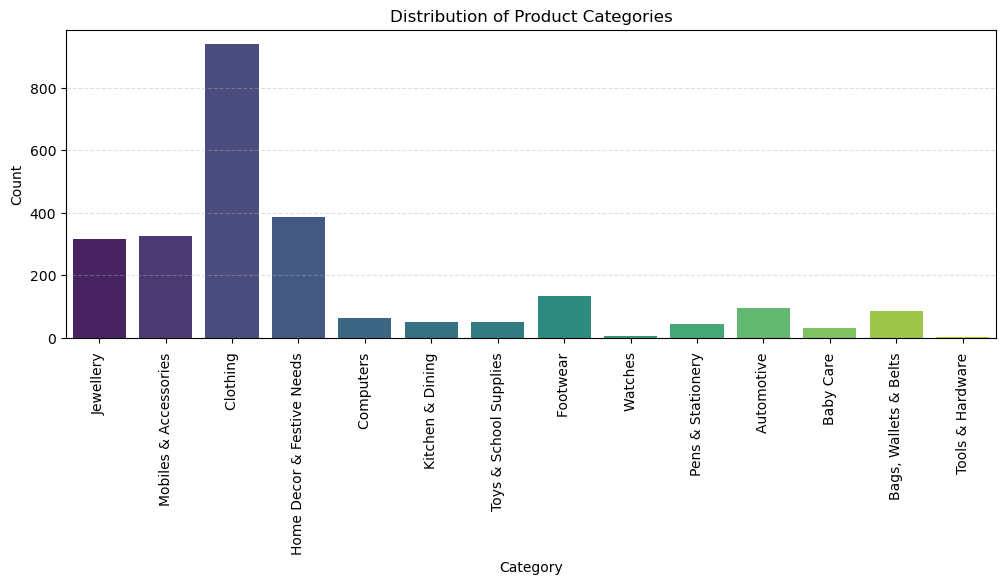

In [19]:
# Plot a bar chart for the 'category' column
plt.figure(figsize=(12, 4))
sns.countplot(x='Predicted_Category', data=final_data, palette='viridis')
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

## Conclusion
In this project, we successfully performed multi-text classification using a LinearSVC model. The model was evaluated using standard metrics, and the results indicate its effectiveness. Future work could involve experimenting with more advanced models and techniques to further improve performance.